## 多层感知机

多层感知机是在单层神经网络的基础上引入一到多个隐藏层，隐藏层位于输入层和输出层之间。 
假设多层感知机的输入个数为$d$，只有一个隐藏层，其中隐藏层的单元个数为$h$，记隐藏层的输出为$H$，隐藏层的权重参数和偏差分别为$W_{d\times h}$和$b_h$。只有一个隐藏层的多层感知机，其输出$O$为
$$
\begin{aligned}
H &= X W_h + b_h \\
O &= H W_o + b_o
\end{aligned}
$$

将上面两个式子联合起来，得到
$$
O = (XW_h + b_h)W_o + b_o = XW_hW_o + b_hW_o + b_o
$$

从联立后的式子可以看出，**虽然引入了隐藏层，却依然等价于一个单层的神经网络：其输出层的权重为$W_hW_o$。**而且，即便添加再多的隐藏层，以上设计依然只能与仅含输出层的单层神经网络等价。

## 激活函数
上述问题的根源在于全连接层只是对数据进行**仿射变换 affine transformation**，而多个仿射变换的叠加仍然是一个仿射变换。 解决该问题的一个方法是**引入非线性变换**，例如对隐藏 变量使用按元素的非线性变换，再作为下一个全连接层的输入。 这个非线性的函数被称为**激活函数 Activation Function**。

### ReLU函数
ReLU(rectified linear unit)函数提供了一个简单的非线性函数，给定元素$x$，函数定义为：
$$
ReLU(x) = max(x,0)
$$
可以看出，该函数之保留正数元素，并将负数清零。 

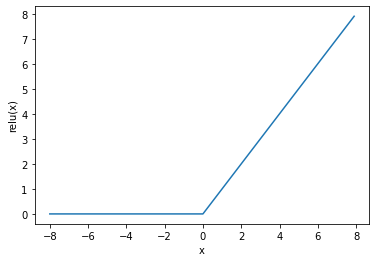

In [2]:
import torch
import numpy as np 
import matplotlib.pylab as plt

def xyplot(x_vals,y_vals,name):
    
    plt.plot(x_vals.detach().numpy(),y_vals.detach().numpy())
    plt.xlabel('x')
    plt.ylabel(name + '(x)')
    plt.show()

x = torch.arange(-8.0,8.0,0.1,requires_grad=True)
y = x.relu()
xyplot(x,y,'relu')

显然，当输入为负数时，ReLU函数的导数为0；当输入为正数时，ReLU函数的导数为1.在输入为0，ReLU是不可导的，我们取此处的导数为0，ReLU函数的导数图像

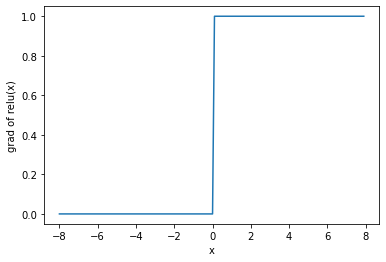

In [3]:
y.sum().backward()
xyplot(x,x.grad,'grad of relu')

### Sigmoid函数

sigmoid函数可以将元素的值变换到0和1之间：
$$
sigmoid(x) = \frac{1}{1 + \exp(-x)}
$$
sigmoid函数在早期的神经网络中较为普遍，但它目前逐渐被更简单的ReLU函数取代。在后面“循环神经网络”一章中我们会介绍如何利用它值域在0到1之间这一特性来控制信息在神经网络中的流动。下面绘制了sigmoid函数。当输入接近0时，sigmoid函数接近线性变换.

sigmoid函数的主要问题在函数值过大或者过小时，梯度值太小，收敛缓慢。


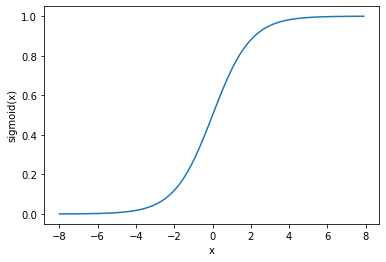

In [4]:
y = x.sigmoid()
xyplot(x,y,'sigmoid')

sigmoid函数的导数为
$$
sigmoid'(x) = sigmoid(x) (1 - sigmoid(x))
$$
当输入为0时，sigmoid函数的导数达到最大值0.25；当输入越偏离0时，sigmoid的导数越接近于0。 梯度值太小，会导致收敛缓慢。

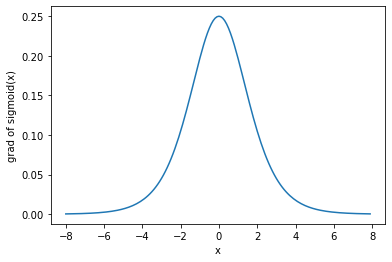

In [5]:
x.grad.zero_() # 清零之前的梯度
y.sum().backward()
xyplot(x,x.grad,'grad of sigmoid')

### tanh函数

tanh（双正切函数）可以将元素的值变换到-1和1之间
$$
tanh(x) = \frac{1-\exp(-2x)}{1 + \exp(-2x)}
$$
当输入接近0时，tanh函数接近线性变换。虽然该函数的形状和sigmoid函数的形状很像，但tanh函数在坐标系的原点上对称。

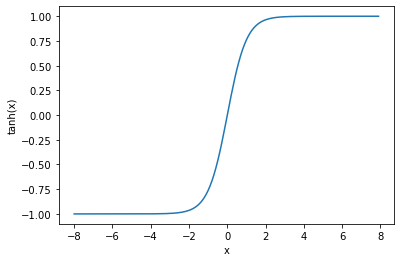

In [6]:
y = x.tanh()
xyplot(x,y,'tanh')


当输入为0时，tanh的导数达到最大值；当输入越偏离0时，tanh函数的导数越接近于0，这时候就收敛缓慢。

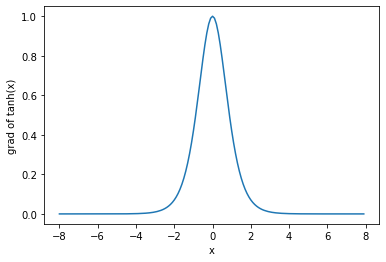

In [8]:
x.grad.zero_()
y.sum().backward()
xyplot(x,x.grad,'grad of tanh')